Kaggle War Field-2
===
EDA
---


<font size=+1>

Advanced Visualization introduced, plotly and pyecharts inluded. The way to display their output on Google drive/Kaggle is different from it on local box: firstlt, save output in html, (keep the interactivity), and use `IPython`'s `HTML()` to display it

Ways to open generatead visulization ouput depend on what kind of platforms we used;

1. Gui-end apps and browsers, like firefox, chrome, brave etc, it is okay for static pics display.
2. certain viz, with UI interactity, some diferent among the user's platform:
   - for app's. Jupyter, VS code or Cursor, use `fig.rendor_notebook()` or `fig.rendor(), while ` to displau after fig was created.
   - Working within Google Drive or Kaggle, we have to create whole result in HTML format and use `IPython.display.HTML()` to display the output. Or create static output and display out the image.
3. Although GitHub can almost generate `ipynb`'s file, but can't generate the interactive viz from plotly/pyechart.   


1. [Kaggle](kaggle.com)
2. [QuanEcon](https://datascience.quantecon.org/pandas/data_clean.html#pd-cln-ex)

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
!python --version

In [ ]:
import warnings
warnings.simplefilter("ignore")


Chipotle Data
---

This data has order information from almost 2,000 `Chipotle` orders and includes information on what was ordered and how much it cost.

In [ ]:
import numpy as np # linear algebra
import pandas as pd

In [ ]:
# As before, the first feature, "Unnamed: 0", is the `index` column

url = "https://datascience.quantecon.org/assets/data/chipotle_raw.csv.zip"

# use the first column as index
chipotle = pd.read_csv(url,index_col=0)
chipotle.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [ ]:
chipotle.info()

Dataset Study
---

<font size=+1>
    
1. <del>delete unnecessary data, `Unnamed: 0`</del>
2. convert suitable format
   - `item_price`: delete the first character, '$', and convert to float format <font color="red">(✓)</font>
   - evaluate total cost in each order, (`the first two highest ones`)
4. How many missing items are there in this dataset? How many missing items in each column? Whish ones own(s) nan's?
5. What is the average price of an ordered item with chicken?
6. What is the average price of an ordered item with steak?
7. Whick kind of order produce more revenue (total), chicken or steak ?


Answer
---
2-7



In [ ]:
#
# chipotle.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
# set(chipotle['item_name'].tolist())

chipotle['item_name'].value_counts()

,count
item_name,
Chicken Bowl,726
Chicken Burrito,553
Chips and Guacamole,479
Steak Burrito,368
Canned Soft Drink,301
Chips,211
Steak Bowl,211
Bottled Water,162
Chicken Soft Tacos,115


In [ ]:
# how many kind of orders are ther?
chipotle[['item_name']].nunique()

,0
item_name,50


What High Techinque is
---

<font size=+1>

`At first, what you can conclude from above?`

But

```
     High Techinque   
      
➠  Routine, more inteligent, and more fast

   with  Professional knowledge + AI Tools
         Smart Representation (with confidence)
```    




In [ ]:
# visuzialize the data
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

import plotly.express as px

Text(0.5, 1.0, 'Ordered Items')

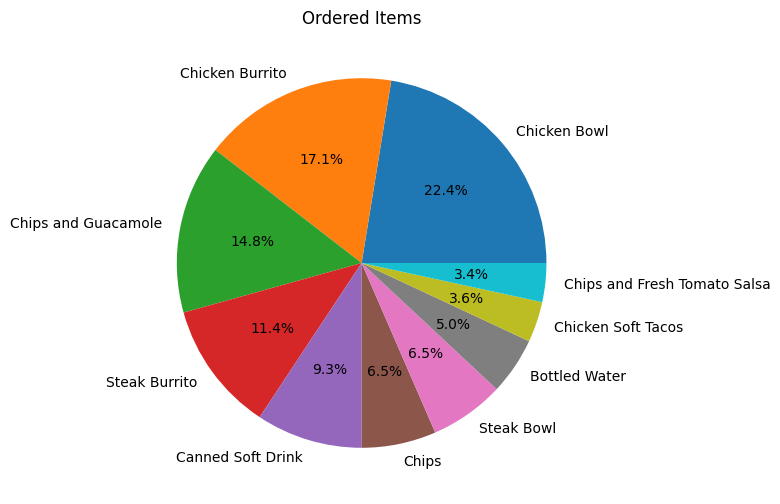

In [ ]:
# Calculate value counts
counts = chipotle['item_name'].value_counts()

#sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(counts[:10], labels=counts.index[:10], autopct='%1.1f%%')
plt.title('Ordered Items')

Use `plotly`

In [ ]:
# centered title
fig=px.pie(counts[:10], values=counts[:10], names=counts.index[:10], title='Ordered Items', hole=0.2)

# Pull out the slice for the year 2007
pull_values = [0.1 if item == 'Chicken Bowl' else 0 for item in counts.index[:10]]
fig.update_traces(pull=pull_values)

fig.show()

Pyecharts Vizualization
---

<font size=+1>

Not only interactivity supported, pyecharts also supports the utf-8 display.

In [ ]:
!pip install -q pyecharts

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.7/153.7 kB 3.1 MB/s eta 0:00:00


In [ ]:
from pyecharts import options as opts
from pyecharts.charts import Pie

In [ ]:
item=chipotle['item_name'].value_counts().index.tolist()
count=chipotle['item_name'].value_counts().values.tolist()

# create data for pyechart, [(x,y),...]
dataset=[list(z) for z in zip(item[:10],count[:10])]

In [ ]:
c=(
    Pie()
    .add("", dataset,
         radius=["45%", "75%"],
         center=["45%", "50%"],
         rosetype="radius",
        )
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))
    .set_global_opts(
                     title_opts=opts.TitleOpts(title="Polularity of Items, 最受歡迎的菜單, Popularität der Artikel",pos_left="10%",),
                     legend_opts=opts.LegendOpts(type_="scroll", pos_left="85%", orient="vertical")
                    )
)
c.render_notebook()

In [ ]:
c.render("pie_chart.html")

'/content/pie_chart.html'

In [ ]:
from IPython.display import HTML

HTML('pie_chart.html')

In [ ]:
# 3. Nan info

chipotle.isnull().sum(0)

Ignore the Nan items since only  occur at `choice_description` feature!

# 2 Convert 'item_price'

chipotle['item_price'] =chipotle['item_price'].str.replace('$','')

In [ ]:
# 2. Convert `object` format to numeric
#    evaulate total in each order

chipotle['item_price'] =chipotle['item_price'].str.replace('$','')

chipotle['item_price']=chipotle['item_price'].astype(float)
chipotle['quantity']=chipotle['quantity'].astype(int)

item_price = pd.to_numeric(chipotle['item_price'])
quantity = pd.to_numeric(chipotle['quantity'])

chipotle['order_value'] = quantity* item_price

chipotle[:6]

In [ ]:
chipotle.info()

In [ ]:
# average of revenue of order if chicken included, 8.75

chipotle.loc[chipotle['item_name'].str.contains('Chicken'), ['item_name','item_price']]

Values of Orders
---
Not only one item included in each order, sum up items in each order:

In [ ]:
# Average $9.25, Reasonable!, the revenue from 'Steak' order is higher than 'Chicken' one

chipotle.loc[chipotle['item_name'].str.contains('Steak'), ['item_name','item_price']]


In [ ]:
chipotle.loc[chipotle['item_name'].str.contains('Steak'), ['item_price']].mean()

EDA Advanced
---
<font size=+1>

Original dataset is detailed list for each item in each order. <br>However, there is not always only one item in one order, <br>Maybe more than two items, meaning `order in group`.

In [ ]:
#  put together by group

df_group = chipotle.groupby(['order_id']).sum()

In [ ]:
df_group[:10]

What's Value of order
---

<font size=+1>

Suppose that $ X_1,X_2,\cdots,X_n$ identically independed random variables (i.i.d.r.v.'s), we can use the following to represent the information of samples
1. mean, i.e average,
$$ \bar X=\frac{X_1+X_2+\dots+X_n}{n}$$
2. median,
   $$P(X_i< X_{median})\approx\frac{1}{2}, P(X_i> X_{median})\approx\frac{1}{2}$$

Both are similar but mean could be more skewed by orders that were significantly more expensive or significantly cheaper. If the variable is not in `float`/`int` format, but in ``category` one, use median is more suitable.    

In [ ]:
# Mean statistic
df_group[['quantity','order_value']].mean()

In [ ]:
# Median statistics
df_group[['quantity','order_value']].median()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:


plt.figure(figsize=(10,4))
sns.displot(df_group['order_value'])
plt.xlabel("Order Value")
plt.ylabel("Frequency")
plt.title("General Distribution of the Order Value", size=24);

In [ ]:
# boxplot showing the total number of items per order
plt.boxplot(df_group['order_value'])
plt.title('Total Number of Items per Order')
plt.ylabel('Count');

Note
---

<font size=+1>

The vast majority of orders concentrates around $20-$30 but the plot reaches values up to $200,
(but only few orders). These data are named as `outliers`.

In [ ]:
# arrange the number of items in each order

sorted = chipotle[['quantity','order_value']].sort_values('order_value', ascending=False)
sorted

In [ ]:
data = chipotle.drop([chipotle.index[3598]])
data = data.groupby(['order_id']).sum()

In [ ]:
plt.figure(figsize=(10,6))
sns.displot(data['order_value'])
plt.xlabel("Order Value")
plt.ylabel("Frequency")
plt.title("General Distribution of the Order Value", size=24)

In [ ]:

plt.boxplot(data['order_value'])
plt.title('Total Number of Items per Order')

# change the range of Y-axis
# plt.ylim([0,100])
plt.ylabel('Count');

<img src="https://www.recipetineats.com/tachyon/2020/02/Chicken-Burritos_1.jpg?resize=600%2C1260&zoom=0.72" />
<figcaption>Chichen Burrito </figcaption>

In [ ]:
# What kind of the ordered is most popular

common_match = chipotle.groupby('order_id')['item_name'].unique().astype(str).value_counts()
common_match[:10]

Answer
---


In [ ]:
common_match[-10:]

Conclusion
---

<font size=+1>

1. Burrito and Bowl are the most common choices and they're usually matched with Chips.
2. Drinks are ordered less often.

Best Recommendation
---
<font size=+1 >
With this knowledge Chipotle could introduce `online` menu with the recommendations of the most popular choices .


In [ ]:
#df_menu=
df_menu=pd.DataFrame(chipotle["item_name"].value_counts())

In [ ]:
df_menu[:20]

Streamlit App
---

In [ ]:
!pip install -q streamlit
!npm install localtunnel

Now create a simple demo:

In [ ]:
%%writefile app.py

import streamlit as st

st.title("Hello World 👋")
st.markdown(
    """
    Welcome to the Streamlit World!
    """
)

if st.button("Send balloons!"):
    st.balloons()

In [ ]:
%%writefile app.py


import streamlit as st
import pandas as pd

# Data setup
data = {
    'item_name': [
        'Chicken Bowl', 'Chicken Burrito', 'Chips and Guacamole', 'Steak Burrito', 'Canned Soft Drink',
        'Steak Bowl', 'Chips', 'Bottled Water', 'Chicken Soft Tacos', 'Chips and Fresh Tomato Salsa',
        'Chicken Salad Bowl', 'Canned Soda', 'Side of Chips', 'Veggie Burrito', 'Barbacoa Burrito',
        'Veggie Bowl', 'Carnitas Bowl', 'Barbacoa Bowl', 'Carnitas Burrito', 'Steak Soft Tacos'
    ],
    'count': [
        726, 553, 479, 368, 301, 211, 211, 162, 115, 110, 110, 104, 101, 95, 91, 85, 68, 66, 59, 55
    ]
}
df = pd.DataFrame(data)
df.set_index('item_name', inplace=True)

# Categorize items
def categorize(item):
    if any(x in item.lower() for x in ['drink', 'water', 'soda']):
        return 'Drink'
    return 'Food'

df['category'] = df.index.map(categorize)

# Get food and drink options
food_options = df[df['category'] == 'Food'].index.tolist()
drink_options = df[df['category'] == 'Drink'].index.tolist()

st.title("🍽️ Online Menu")

st.subheader("Today's Specials: Chicken Bowl, Steak Burrito")

# --- Food Selection ---
st.subheader("🍛 Select a Food Item")
selected_food = st.selectbox("Choose your food:", food_options)
food_quantity = st.number_input("Quantity of food", min_value=0, max_value=10, value=0, step=1)

# --- Drink Selection ---

st.subheader("🥤 Select a Drink Item")
selected_drink = st.selectbox("Choose your drink:", drink_options)
drink_quantity = st.number_input("Quantity of drink", min_value=0, max_value=10, value=0, step=1)

# --- Show Order ---
if food_quantity > 0 or drink_quantity > 0:
    st.subheader("🧾 Order Summary")
    summary = []
    if food_quantity > 0:
        summary.append({"Item": selected_food, "Quantity": food_quantity})
    if drink_quantity > 0:
        summary.append({"Item": selected_drink, "Quantity": drink_quantity})
    st.table(pd.DataFrame(summary))
else:
    st.info("Please select quantities for food or drink to see the order summary.")



In [ ]:
# Your public ip is the password to the localtunnel
!curl ipv4.icanhazip.com

In [ ]:
!streamlit run app.py &>./logs.txt & npx localtunnel --port 8501


Note
---


<font size=+1>

[Official Streamlit](http://streamlit.io) avails function to set up app from gitub's repo; in other words, you can upload app.py to github and create app from Streamlit site.

Running streamlit app locally is also very easy;
1. install python environment with streamlit package;
2. run  the following on the terminal:
   ```
   > streamlit run app.py --port 8501
   ```
and browse to visit and test:
```
http://127.0.0.1:8501
```

replace the local ip to exact ip if setup.

In [ ]:
chipotle.to_csv('chipotle.csv',index=False)

In [ ]:
df1= chipotle.reset_index()
df1 = df1.merge(df1, on='order_id').query('index_x > index_y')


In [ ]:
df1 = pd.DataFrame(np.sort(df1[['item_name_x', 'item_name_y']].to_numpy(), axis=1))
df1.groupby([*df1]).size().sort_values(ascending=False)


# Questions

## Exercise 1
What's meaning about, `NaN`?

Association Rules
---

1. Which one is popular?  **The most ordored**
 item
2.  

In [ ]:
# delect Unnamed: 0
chipotle.drop(columns=['Unnamed: 0'],inplace=True)

chipotle.describe(include='all')

In [ ]:
# converting item_price to a float
chipotle["item_price"] = chipotle['item_price'].apply(lambda x: float(x[1:]))

chipotle.item_price.describe()

In [ ]:
# converting item_name to a category
chipotle["item_name"] = chipotle["item_name"].astype("category")


In [ ]:
chipotle.info()

EDA
---

In [ ]:
# showing the number of unique item_names
print("There are ", chipotle["item_name"].nunique(), " unique item_name values.")


In [ ]:
chipotle['item_name'].value_counts()

In [ ]:
# showing the list of unique item_names
chipotle["item_name"].unique()

In [ ]:
# how many distinct orders there are
# print("There are", chip["order_id"].nunique(), "distinct orders.")

chipotle['order_id'].nunique()



In [ ]:
from matplotlib import pyplot as plt
from seaborn import boxplot

# the distribution of the number of line items per order





In [ ]:
# visualize the distribution of the number of line items per order
# boxplot showing the number of line items per order
plt.boxplot(chipotle['order_id'].value_counts())
plt.title('Number of Line Items per Order')
plt.ylabel('Count');


In [ ]:
# boxplot showing the total number of items per order
plt.boxplot(chipotle.groupby('order_id')['quantity'].sum())
plt.title('Total Number of Items per Order')
plt.ylabel('Count');

Question
---
What are the top 5 ordered items by total quantity?

In [ ]:
chipotle.groupby("item_name")["quantity"].sum().sort_values(ascending = False).head(5)


Question
---
What is the total number of Steak Burritos ordered?¶

In [ ]:
print("Total number of steak burritos ordered:", chipotle[chipotle["item_name"] == "Steak Burrito"]["quantity"].sum())


Question
---
What was the store's total revenue in these data?

In [ ]:
print("Total revenue in the dataset", chipotle["item_price"].sum())


Question
---
What was the largest total price for a single order?


In [ ]:
print(chipotle.groupby("order_id")["item_price"].sum().sort_values(ascending=False).head(1))



In [ ]:
chipotle[chipotle["order_id"] == chipotle.groupby("order_id")["item_price"].sum().sort_values(ascending=False).head(1).index[0]]

Question
---
Which order had the `largest` total quantity of items purchased?¶


In [ ]:
print(chipotle.groupby("order_id")["quantity"].sum().sort_values(ascending=False).head(1))


In [ ]:
# Showing order_id 1443's entire order:
chipotle[chipotle["order_id"] == chipotle.groupby("order_id")["item_price"].sum().sort_values(ascending=False).head(1).index[0]]



Question
---
Which order had the largest total quantity of items purchased?¶


In [ ]:
print(chipotle.groupby("order_id")["quantity"].sum().sort_values(ascending=False).head(1))

In [ ]:
# list all the order
chipotle[chipotle["order_id"] == chipotle.groupby("order_id")["quantity"].sum().sort_values(ascending=False).head(1).index[0]]

Association Rules
---

In [ ]:
df_chipBin = pd.get_dummies(chipotle    ["item_name"])
df_chipBin = pd.concat([chipotle["order_id"], df_chipBin], axis = 1)
df_chipBin = df_chipBin.groupby("order_id").sum()
df_chipBin.reset_index("order_id")
df_chipBin[df_chipBin > 1] = 1

In [ ]:
df_chipBin.head()

In [ ]:
!pip install -q mlxtend

In [ ]:

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
# Initial frequence mining
df_chipBin.sum()
df_chipBin.sum().sort_values(ascending=False).head(10)
# Frequent itemsets




In [ ]:
apriori(df_chipBin, min_support = 0.5, use_colnames=True)


There are `no `frequent itemsets in this data with the minimum support value of 0.5. This is because there are no itemsets that appear within 50% or more of the transactions in our data.

In [ ]:
# absolute support and relative support
df_chipBin.sum()
df_chipBin.sum().sort_values(ascending=False).head(10)
# relative support
df_chipBin.sum()/len(df_chipBin)
df_chipBin.sum()/len(df_chipBin).sort_values(ascending=False).head(10)


In [ ]:
item_counts = df_chipBin.sum(axis=0).sort_values(ascending=False)

item_supports = item_counts / len(df_chipBin.index)

In [ ]:
item_counts_df = pd.DataFrame({
    'Absolute support': item_counts,
    'Relative support': item_supports })

item_counts_df

In [ ]:
# Re-calculating frequent itemsets with lower min_support value 0.0005
chip_ap = apriori(df_chipBin, min_support = 0.005, use_colnames=True)

print("There are", len(chip_ap["itemsets"]), "frequent itemsets.")

chip_ap.sort_values("support", ascending = False)

In [ ]:
new_ap = apriori(df_chipBin, min_support = 0.01, use_colnames=True)


print("There are", len(new_ap["itemsets"]), "frequent itemsets that meet a minimum support of 0.01.")

new_ap.sort_values("support", ascending = False)

Showing the strongest association rules:¶

Filtering rules with a minimum lift threshold of 2 and sorting the result by confidence (descending).

Rules
---
1. Support($A$) = $\frac{\#(A_s)}{\#(all items)}$
2. Conidence = $P(A\to B)=P(B|A)=\frac{Supp(AB)}{Supp(A)}$
3. Lift $P(A\to B)$ = $\frac{Supp(A \cup B)}{Supp(A)Supp(B)}$, i.e. the ratio of the observed support to that expected if A and B were independent.

In [ ]:
lift_ap = association_rules(new_ap, metric = "lift", min_threshold = 2)

lift_ap = lift_ap.sort_values("confidence", ascending = False)

print("The strongest rule is:", lift_ap.head(1))

lift_ap

wWth a confidence value of 0.8, 80% of transactions containing, both bottled water and chips will also contain a chicken bowl.

In [ ]:
rules = association_rules(new_ap, metric="confidence", min_threshold = 0)

guac = rules[rules["consequents"].apply(lambda x: "Chicken Burrito" in x)]

guac = guac.sort_values(["confidence", "lift"], ascending = False)

guac.head()

With confidence, 0.351852, lift, 1.319692,  it indicates that the strongest association rule here are transactions that contain `Chicken Burritoand` and 6 pack soft drink.

In [ ]:
# Associaion
from mlxtend.frequent_patterns import apriori, association_rules



In [ ]:
# Preview important columns
df = chipotle[['order_id', 'item_name']]

# Create basket: 1 if item is in order, else 0
basket = (
    df.groupby(['order_id', 'item_name'])['item_name']
    .count().unstack().reset_index().fillna(0)
    .set_index('order_id')
)

In [ ]:
# basket = basket.applymap(lambda x: 1 if x > 0 else 0)
basket = basket.astype(bool).astype(int)

In [ ]:
# Find frequent itemsets with min_support
frequent_itemsets = apriori(basket, min_support=0.02, use_colnames=True)

In [ ]:
# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [ ]:
# Sort by highest lift
rules = rules.sort_values('lift', ascending=False)

In [ ]:
# Show top rules
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head()

In [ ]:










📈 Output Sample
This would yield insights like:

Antecedent	Consequent	Confidence	Lift
{Chips}	{Guacamole}	0.6	3.2
{Chicken Bowl}	{Canned Soft Drink}	0.4	2.5

Would you like me to run this on your data and show the top associations?









